In [16]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [17]:
image = Image.open("Unequalized_Hawkes_Bay_NZ.jpg")

(683, 1024)


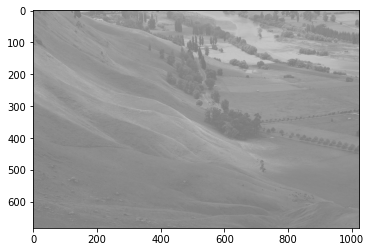

In [18]:
bwimg = np.sum(image, axis=2)
bwimg = np.array(np.floor(bwimg/3), dtype=np.int16)
print(bwimg.shape)
plt.imshow(bwimg, cmap="gray", vmin=0, vmax=255)
plt.show()

In [19]:
def plot_histo(histo_data):
    fig, ax1 = plt.subplots()

    color="tab:blue"
    ax1.bar(np.arange(len(histo_data)), histo_data, width=1.0, color=color)
    ax1.set_ylabel("Histogram", color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    color = 'tab:red'
    ax2 = ax1.twinx()
    ax2.step(np.arange(len(histo_data)), np.cumsum(histo_data), color=color)
    ax2.set_ylabel("Cumulative Frequency", color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.show()

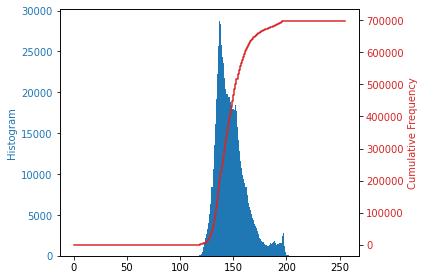

In [20]:
histo_data = np.histogram(bwimg, bins=256, range=(0, 255))[0]
plot_histo(histo_data)

In [21]:
print(histo_data[histo_data == 0].shape)

(161,)


In [22]:
def histo_equal(arr):
    cum = np.cumsum(histo_data)
    cdfmin = np.amin(cum[cum != 0])
    size = arr.shape[0] * arr.shape[1]

    equal = lambda v : np.round((((cum[v]-cdfmin)/(size-cdfmin))*255))
    return np.array([equal(x) for x in bwimg])

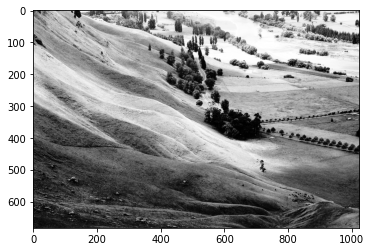

In [23]:
equal_img = histo_equal(bwimg)
plt.imshow(equal_img, cmap='gray', vmin=0, vmax=255)
plt.show()

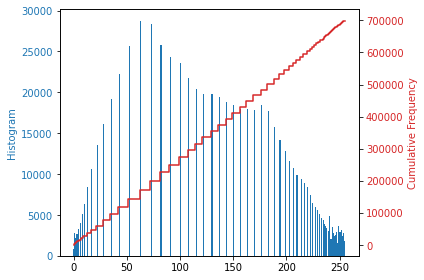

In [24]:
histo_data_euqal = np.histogram(equal_img, bins=256, range=(0, 255))[0]
plot_histo(histo_data_euqal)